### https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.arcgisimage

### https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/

In [1]:
%matplotlib inline


Adding a background map to plots
--------------------------------

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
`contextily <https://github.com/darribas/contextily>`__ package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).


In [7]:
# sphinx_gallery_thumbnail_number = 3
import geopandas

## geopandas datasets available

In [1]:
# sphinx_gallery_thumbnail_number = 3
import geopandas
geopandas.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



## Get Latitude and longitude for a city

In [24]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
loc = geolocator.geocode("New York, NY")
loc


Location(New York, United States of America, (40.7127281, -74.0060152, 0.0))

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
loc = geolocator.geocode("Eureka Springs, AR")
loc


Location(Eureka Springs, Carroll County, Arkansas, United States of America, (36.4000796, -93.7392419, 0.0))

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
loc = geolocator.geocode("Manila, PH")
loc

Location(Manila, Metro Manila, Philippines, (14.5906216, 120.9799696, 0.0))

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
loc = geolocator.geocode("Gaya Gaya, Bulacan")
loc

Location(Gaya-Gaya Elementary School, Santa Maria - Tungkong Mangga Road, Graceville, Elysian Home, Muzon, Bulacan, Central Luzon, 3023, Philippines, (14.795854899999998, 121.0498267, 0.0))

In [26]:
import geopandas
gdf = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
import pyproj
crs = pyproj.CRS("EPSG:31370")
crs

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

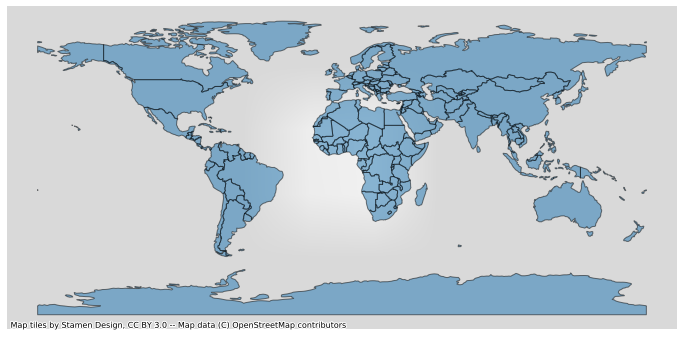

In [16]:
%matplotlib inline
import contextily as ctx
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = df.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()


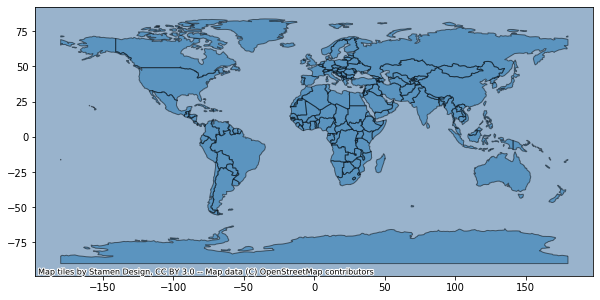

In [12]:
import contextily as ctx
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

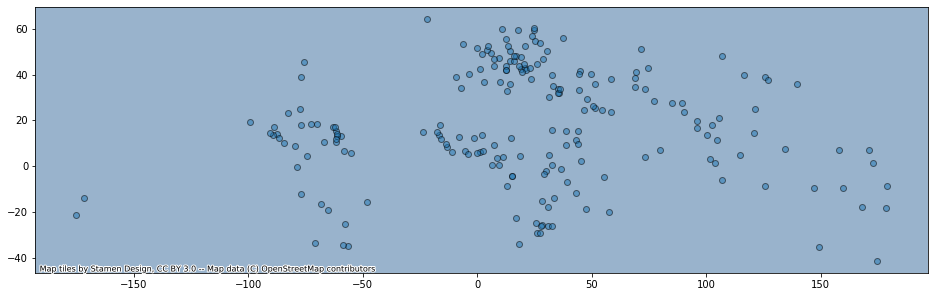

In [18]:
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
ax = df.plot(figsize=(16, 16), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

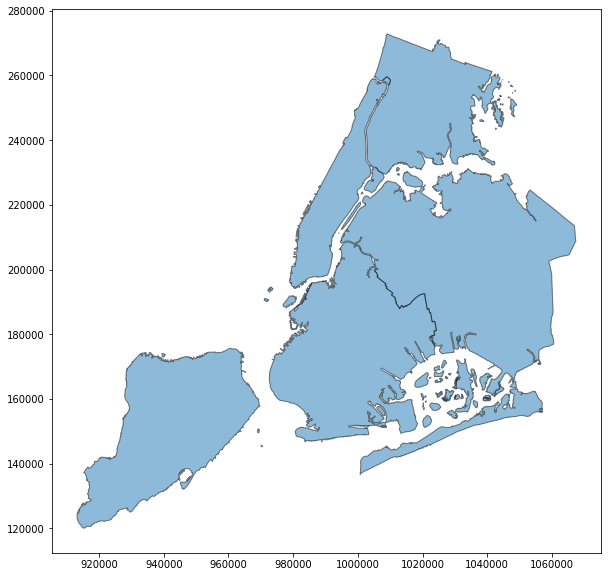

In [8]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [12]:
df = df.to_crs(epsg=3857)

In [13]:
import contextily as ctx

Add background tiles to plot
============================

We can use `add_basemap` function of contextily to easily add a background
map to our plot. :



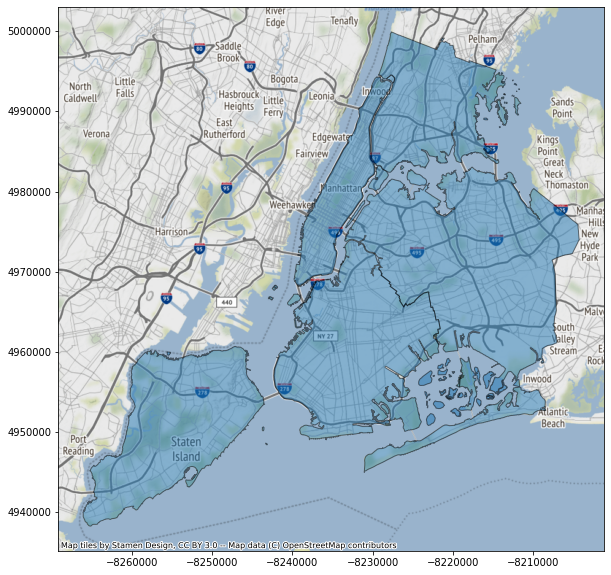

In [14]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

We can control the detail of the map tiles using the optional `zoom` keyword
(be careful to not specify a too high `zoom` level,
as this can result in a large download).:



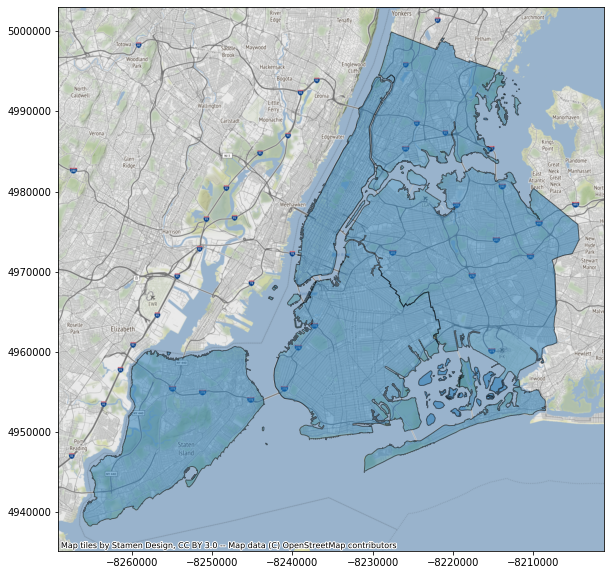

In [15]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.providers``:



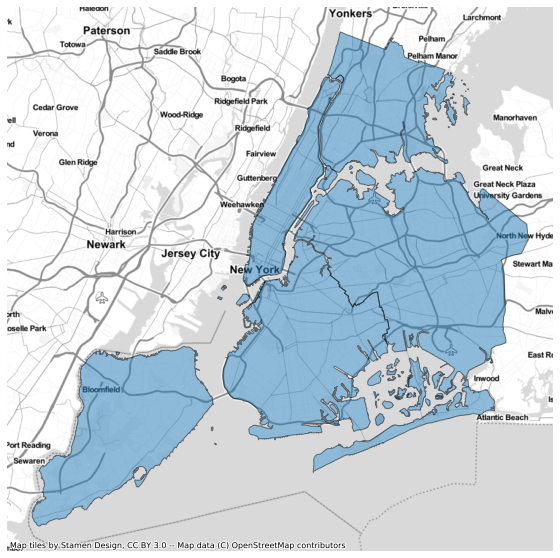

In [17]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [11]:
!pip install contextily

     |████████████████████████████████| 112kB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 18.1MB 239kB/s eta 0:00:01     |███████████████████████▋        | 13.3MB 5.6MB/s eta 0:00:01     |████████████████████████████    | 15.9MB 3.1MB/s eta 0:00:01     |██████████████████████████████▎ | 17.1MB 1.7MB/s eta 0:00:01


In [6]:
!pip install descartes

In [3]:
!pip install geopandas

     |████████████████████████████████| 931kB 666kB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 9.3MB/s eta 0:00:01    |█████████████████▍              | 5.7MB 5.0MB/s eta 0:00:01     |███████████████████             | 6.2MB 5.0MB/s eta 0:00:01     |███████████████████████▉        | 7.7MB 9.3MB/s eta 0:00:01     |███████████████████████████████ | 10.0MB 9.3MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 2.9MB/s eta 0:00:01    |███████▉                        | 3.6MB 2.6MB/s eta 0:00:05     |██████████████████████████████▉ | 14.2MB 2.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e4/be/30a58b4b0733850280d01f8bd132591b4668ed5c7046761098d665ac2174/cligj-0.5.0-py3-none-any.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
